## Assignment 3
* Designed by: Katanoush Morovat
* Creation Date: March/19/2022

#### Objective
* Build a Regression model to predict the weight of fish

In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score 

%matplotlib inline

Read The Fish.csv

In [182]:
fish = pd.read_csv("Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [183]:
fish.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


### Data Exploratory

In [184]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [185]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [186]:
fish[fish.duplicated()]

,Species,Weight,Length1,Length2,Length3,Height,Width


* No null rows, no duplicate rows

In [187]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


<AxesSubplot:>

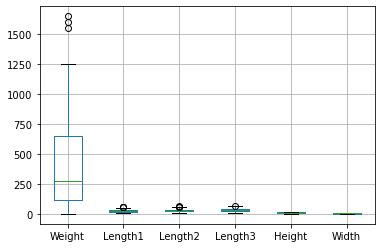

In [188]:
fish.boxplot()

In [189]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [190]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:>

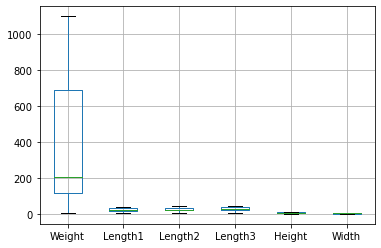

In [191]:
fish[fish['Species']=='Perch'].boxplot()

<AxesSubplot:>

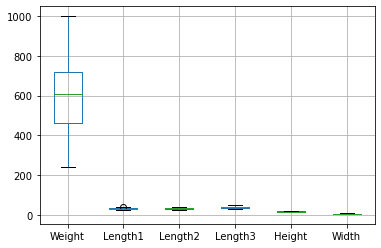

In [192]:
fish[fish['Species']=='Bream'].boxplot()

<AxesSubplot:>

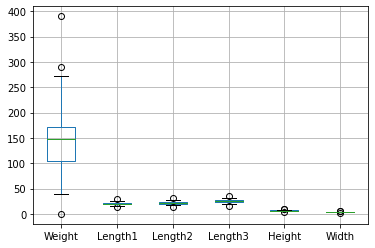

In [193]:
fish[fish['Species']=='Roach'].boxplot()

<AxesSubplot:>

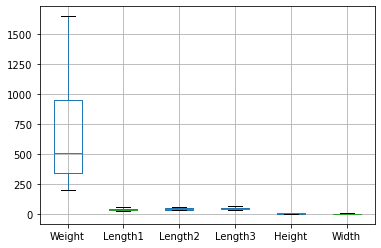

In [194]:
fish[fish['Species']=='Pike'].boxplot()

<AxesSubplot:>

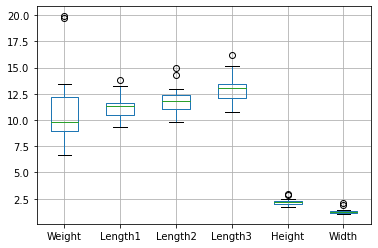

In [195]:
fish[fish['Species']=='Smelt'].boxplot()

<AxesSubplot:>

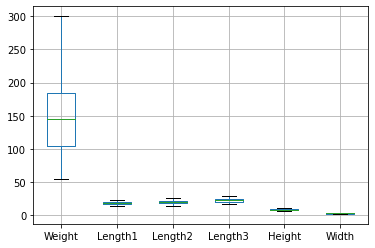

In [196]:
fish[fish['Species']=='Parkki'].boxplot()

<AxesSubplot:>

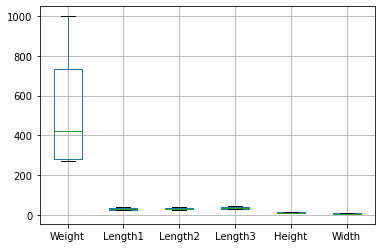

In [197]:
fish[fish['Species']=='Whitefish'].boxplot()

* Outliers in the fish type such as ['Bream', 'Roach', 'Smelt']

In [178]:
def outliers(x):
    for label in ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']:
        q3, q1 = np.percentile(x[label], [75 ,25])
        iqr=q3-q1
        lower_lim = q1-1.5*iqr
        upper_lim = q3+1.5*iqr
        if lower_lim<0:
            lower_lim=x[label].min()
        x[label] = x[label].mask((x[label]<lower_lim) | (x[label]>upper_lim), np.nan)
    return x

In [179]:
#outliers(fish[fish['Species']=='Bream'])
y = outliers(fish[fish['Species']=='Roach'])
#outliers(fish[fish['Species']=='Smelt'])



C:\Users\kmoro\AppData\Local\Temp/ipykernel_26516/2020476478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[label] = x[label].mask((x[label]<lower_lim) | (x[label]>upper_lim), np.nan)


In [181]:
y

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,NaN,NaN,NaN,NaN,NaN
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,NaN,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


In [164]:
fish[fish['Species']=='Roach'].describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,20.0,152.050000,88.828916,0.0000,104.250000,147.5000,171.75000,390.000
Length1,20.0,20.645000,3.459917,12.9000,18.900000,20.5000,22.02500,29.500
Length2,20.0,22.275000,3.651946,14.1000,20.375000,22.2500,23.62500,31.700
Length3,20.0,24.970000,4.031599,16.2000,22.650000,24.8500,26.90000,35.000
Height,20.0,6.694795,1.261192,4.1472,6.037075,6.5126,7.16415,9.485
Width,20.0,3.657850,0.690371,2.2680,3.317325,3.6027,3.85290,5.355


In [199]:
for label in ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']:
    q3, q1 = np.percentile(fish[label], [75 ,25])
    iqr=q3-q1
    lower_lim = q1-1.5*iqr
    upper_lim = q3+1.5*iqr
    if lower_lim<0:
        lower_lim=fish[label].min()
    fish[label] = fish[label].mask((fish[label]<lower_lim) | (fish[label]>upper_lim), np.nan)
    

In [200]:
fish.isnull().sum()

Species    0
Weight     3
Length1    3
Length2    3
Length3    1
Height     0
Width      0
dtype: int64

<AxesSubplot:>

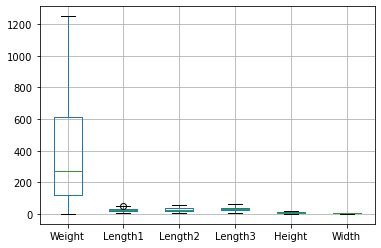

In [203]:
fish.boxplot()  #still data frame has outlier data???

In [202]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.00000,271.0000,612.5000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.00000,25.0000,32.1250,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.00000,26.7500,35.0000,56.000
Length3,158.0,30.994304,11.268932,8.8000,23.12500,29.3500,39.5750,64.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [204]:
fish.dropna(inplace=True)

In [205]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    object 
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


Find the correlation metrix

In [206]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


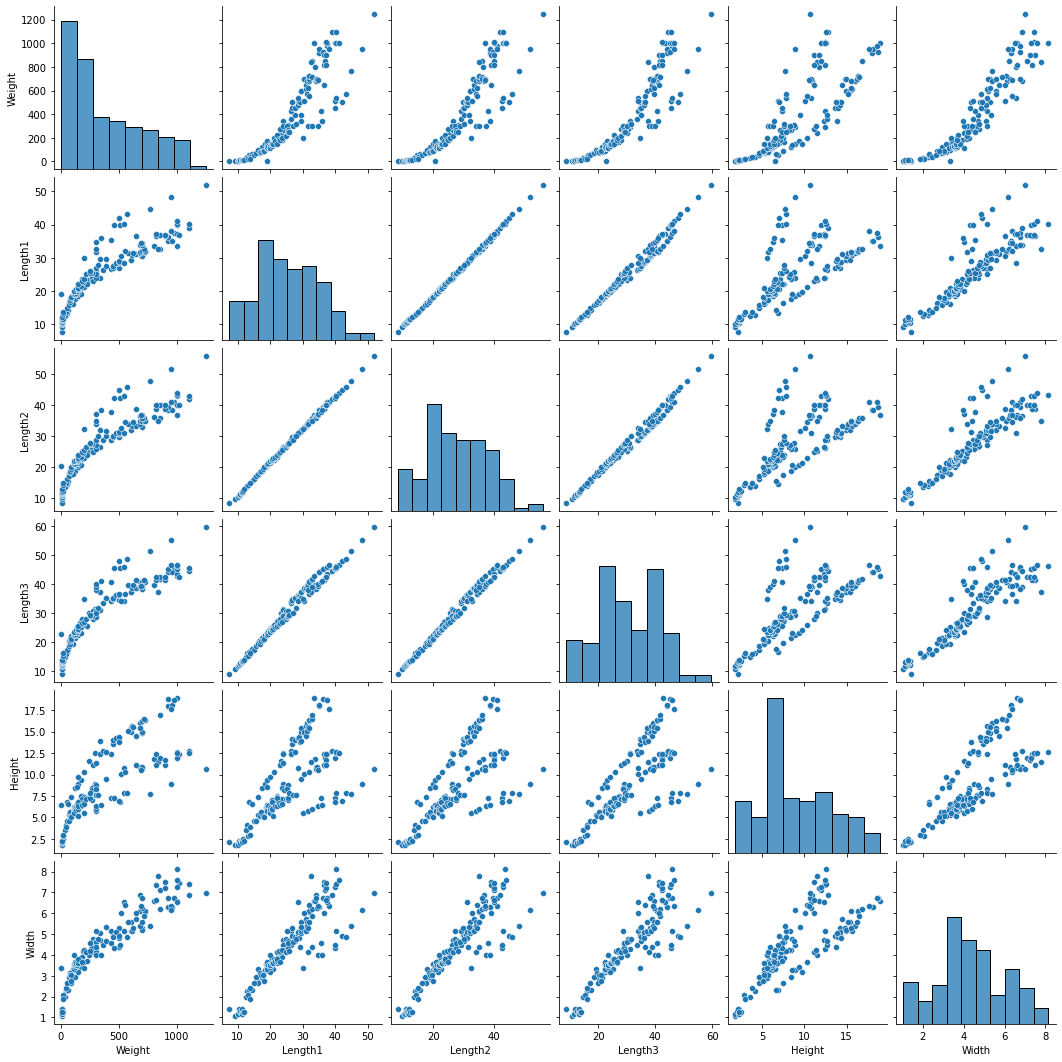

In [207]:
sns.pairplot(fish)

* Length1 & Length2 & Length3 are highly correlated

Plot the scatter plot for each pair of numerical variables in the dataset

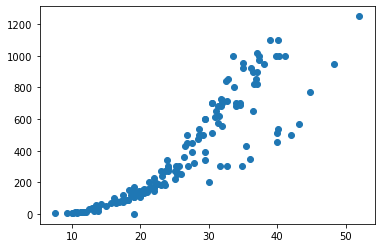

In [58]:
plt.scatter(fish['Length1'], fish['Weight'])


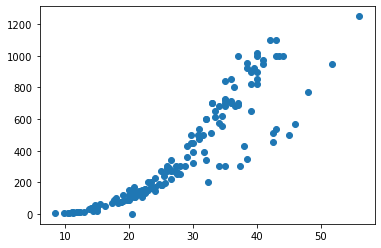

In [59]:
plt.scatter(fish['Length2'], fish['Weight'])

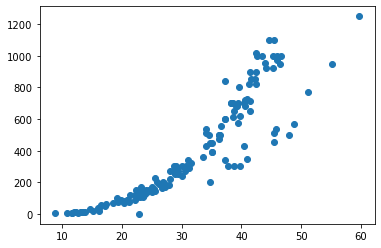

In [60]:
plt.scatter(fish['Length3'], fish['Weight'])

Plot the Heat Map

<AxesSubplot:>

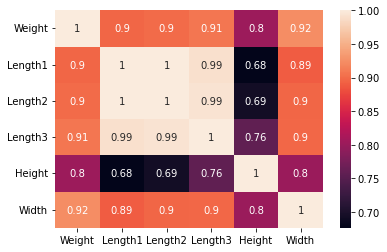

In [208]:
relation = fish.corr()
relation_index = relation.index
sns.heatmap(fish[relation_index].corr(), annot=True)

* High correlation between Length1 and Length2. Since Length2 will not add any points to the model, this field should be ignored in creating Regression model and Length3 as well
* Weight is highly correlated to the 3 Lengths 

# Linear Regression

Use the highest correlated feature to Weight to build an univariate regression model to predict Weight

In [218]:
# split data into train set and test set
X = fish[['Length3', 'Height', 'Width']]
y = fish['Weight']
 

In [219]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [220]:
X_train.shape

(109, 3)

In [221]:
X_test.shape

(47, 3)

In [222]:

model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

What are the model coefficients?

In [223]:
a = model.coef_
c = model.intercept_
print(a,c)

[12.67126339 10.93627595 89.80848067] -506.35074720342254


Apply the model on the test set

In [224]:
y_pred = model.predict(X_test)

Evaluate the model

In [225]:
print(f'mse: {mse(y_test, y_pred)} \nR2 Score: {r2_score(y_test, y_pred)}')

mse: 84.2378714093123 
R2 Score: 0.8866804258915585


Plot the scatter plot of Weight and Length and draw the regression line

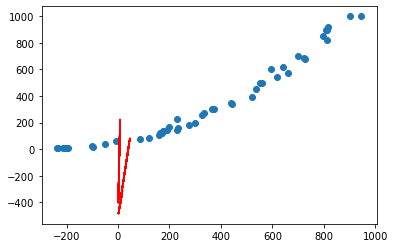

In [226]:
plt.scatter(y_pred, y_test)
plt.plot(X_test, a*X_test+c, color='r')

In [227]:
# split data into train set and test set
X = fish[['Length3']]
y = fish[['Weight']]
 

In [228]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [229]:
X_train.shape

(109, 1)

In [230]:
X_test.shape

(47, 1)

In [231]:

model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

What are the model coefficients?

In [232]:
a = model.coef_
c = model.intercept_
print(a,c)

[[27.6445739]] [-471.96071188]


Apply the model on the test set

In [233]:
y_pred = model.predict(X_test)

Evaluate the model

In [234]:
print(f'mse: {mse(y_test, y_pred)} \nR2 Score: {r2_score(y_test, y_pred)}')

mse: 103.58056499218443 
R2 Score: 0.8200077416447229


Plot the scatter plot of Weight and Length and draw the regression line

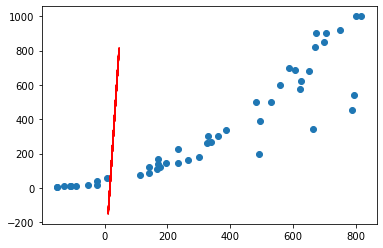

In [235]:
plt.scatter(y_pred, y_test)
plt.plot(X_test, a*X_test+c, color='r')

Build a Linear Regression to predict 'Weight' with three features 'Length3', 'Height', 'Width'

Split the data set to train and test 

Apply and evaluate the model

What is the coefficients of the model?

Plot the scatter plot of y_test and the prediction

Predict the Weight if Lenght3 = 30,  Height = 23, Width = 15